In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src')

import os 
import pandas as pd
import time
import numpy as np
import re
import matplotlib.pyplot as plt
import json

import ccmodel

1/30 Freq19520_Frame2_Exp100 t=6.68s etc=3m13s
2/30 Freq19540_Frame2_Exp100 t=4.95s etc=2m42s
3/30 Freq19560_Frame2_Exp100 t=12.92s etc=3m40s
4/30 Freq19580_Frame2_Exp100 t=3.54s etc=3m2s
5/30 Freq19600_Frame2_Exp100 t=12.00s etc=3m20s
6/30 Freq19620_Frame2_Exp100 t=3.99s etc=2m56s
7/30 Freq19640_Frame2_Exp100 t=3.23s etc=2m35s
8/30 Freq19660_Frame2_Exp100 t=4.09s etc=2m21s
9/30 Freq19680_Frame2_Exp100 t=4.15s etc=2m9s
10/30 Freq19700_Frame2_Exp100 t=4.20s etc=1m59s
11/30 Freq19720_Frame2_Exp100 t=4.05s etc=1m50s
12/30 Freq19740_Frame2_Exp100 t=2.84s etc=1m39s
13/30 Freq19760_Frame2_Exp100 t=2.93s etc=1m30s
14/30 Freq19780_Frame2_Exp100 t=10.90s etc=1m31s
15/30 Freq19800_Frame2_Exp100 t=3.19s etc=1m23s
16/30 Freq19820_Frame2_Exp100 t=3.50s etc=1m16s
17/30 Freq19840_Frame2_Exp100 t=3.50s etc=1m9s
18/30 Freq19860_Frame2_Exp100 t=3.05s etc=1m2s
19/30 Freq19880_Frame2_Exp100 t=2.90s etc=0m55s
20/30 Freq19900_Frame2_Exp100 t=2.95s etc=0m49s
21/30 Freq19920_Frame2_Exp100 t=2.92s etc=0m43s
22

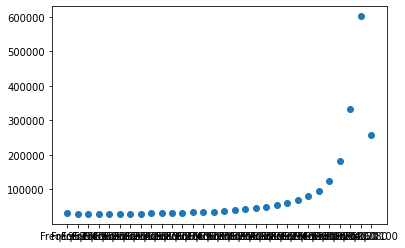

In [3]:
config = {
    'number_of_pixels' : 32,
    'regions' : {
        'left' : {
            'up' : 12,
            'bottom' : 16,
            'left' : 9,
            'right' : 13,
        }, 
        'right' : {
            'up' : 12,
            'bottom' : 16,
            'left' : 17,
            'right' : 21,
        }
    },
    'coincidence_window' : 2,
    'jitter_path' : r'/mnt/c/Users/stnav/OneDrive - HKUST Connect/Academics/Jensen Lab/Python codes/ccmodel_v3/common/_20200926_JitterCali_DropBadPixel.csv',
    'working_directory' : r'/mnt/e/Data/JensenLab/VarySyncFine',
    'write_directory' : r'/mnt/e/Data/JensenLab/VarySyncFine/analysis',
    'modes' : {
        'pixel_accumulated_count' : True,
        'time_accumulated_count' : True,
        'pixel_coincidence_count' : False,
        'time_coincidence_count' : True,
    },
    'filters' : ['create_cross_filter', 'create_bright_filter'],
    'threshold' : 0.2,
    # 'image_model' : r'E:/Data/JensenLab/test/analysis/data_pixel_accumulated_count/2690816_Frame5_Exp250_iter1.csv'
}     

start_time = time.time()

ld = os.listdir(path=config['working_directory'])
files = set()
paths = list()
times = np.array([])

# get unique files
for file in ld:
    match = re.match('(.+)\.(txt|npy|npz)$', file)
    if match is None: continue
    file = match[1]
    files.add(file)

files = sorted(list(files))

for file in files:
    for ext in ('.npz', '.npy', '.txt'):
        if file + ext in ld:
            break
    path = os.path.join(os.path.abspath(config['working_directory']), file+ext) 
    paths.append(path)

# prepare filter
filter = ccmodel.Filter(config)

if 'image_model' not in config:
    tb = ccmodel.TimeBin(paths[0], config, filter.create_base_filter(), debug=False, init_only=True)
    tb.initialize_pixel_accumulated_count()
    tb.write_to_file()
    tb.save_figures()
    config['image_model'] = config['write_directory'] + '/data_pixel_accumulated_count/' + os.path.basename(paths[0]).split('.')[0] + '.csv'

custom_filter = filter.create_base_filter() 
for f in config['filters']:
    custom_filter = custom_filter & getattr(filter, f)()
    
fig = plt.figure(figsize=(8, 6))
plt.imshow(filter.get_bright_image_model())
plt.savefig(os.path.join(config['write_directory'], 'filtered.png'))
plt.close()
# filter.plot_filter()

# record config
os.makedirs(config['write_directory'], exist_ok=True)
with open(os.path.join(config['write_directory'], 'config.json'), 'w') as f:
    json.dump(config, f, indent=2)

for i in range(len(paths)):
    start_iter_time = time.time()

    print(str(i+1) + '/' + str(len(files)), files[i], end=' ')

    tb = ccmodel.TimeBin(paths[i], config, custom_filter)
    tb.write_to_file()
    tb.save_figures()

    end_iter_time = time.time()
    iter_time = end_iter_time - start_iter_time
    print('t=' + '%.2f' % iter_time + 's', end=' ')
    times = np.append(times, iter_time)
    elapsed_time = times.sum()
    estimated_total_time = np.average(times)*len(files)
    estimated_time_left = estimated_total_time - elapsed_time
    print('etc=' + '%d' % (estimated_time_left//60) +'m' + '%d' % (estimated_time_left % 60) + 's')

end_time = time.time()
print('Total Elapsed Time:', '%d' % ((end_time-start_time)//60) +'m' + '%d' % ((end_time-start_time) % 60) + 's')

delay_cc = ccmodel.analysis.cc_vs_delay(config['write_directory'] + '/data_time_coincidence_count', config['coincidence_window'])
plt.scatter(*delay_cc)
plt.savefig(config['write_directory'] + '/delay_cc.png')
plt.close()


In [4]:
config = {
    'number_of_pixels' : 32,
    'regions' : {
        'left' : {
            'up' : 8,
            'bottom' : 18,
            'left' : 4,
            'right' : 9,
        }, 
        'right' : {
            'up' : 9,
            'bottom' : 18,
            'left' : 18,
            'right' : 27,
        }
    },
    'coincidence_window' : 2,
    'jitter_path' : r'/mnt/c/Users/stnav/OneDrive - HKUST Connect/Academics/Jensen Lab/Python codes/ccmodel_v3/common/_20200926_JitterCali_DropBadPixel.csv',
    'working_directory' : r'/mnt/e/Data/JensenLab/FineScan_Aligned_1.2MCount10sPerPixel_5usFrame12x12SpotSize',
    'write_directory' : r'/mnt/e/Data/JensenLab/FineScan_Aligned_1.2MCount10sPerPixel_5usFrame12x12SpotSize/analysis_cc_imaging',
    'modes' : {
        'pixel_accumulated_count' : True,
        'time_accumulated_count' : True,
        'pixel_coincidence_count' : True,
        'time_coincidence_count' : True,
    },
    'filters' : ['create_cross_filter', 'create_bright_filter'],
    'threshold' : 0.2,
    # 'image_model' : r'E:/Data/JensenLab/test/analysis/data_pixel_accumulated_count/2690816_Frame5_Exp250_iter1.csv'
}     

start_time = time.time()

ld = os.listdir(path=config['working_directory'])
files = set()
paths = list()
times = np.array([])

# get unique files
for file in ld:
    match = re.match('(.+)\.(txt|npy|npz)$', file)
    if match is None: continue
    file = match[1]
    files.add(file)

files = sorted(list(files))

for file in files:
    for ext in ('.npz', '.npy', '.txt'):
        if file + ext in ld:
            break
    path = os.path.join(os.path.abspath(config['working_directory']), file+ext) 
    paths.append(path)

# prepare filter
filter = ccmodel.Filter(config)

if 'image_model' not in config:
    tb = ccmodel.TimeBin(paths[0], config, filter.create_base_filter(), debug=False, init_only=True)
    tb.initialize_pixel_accumulated_count()
    tb.write_to_file()
    tb.save_figures()
    config['image_model'] = config['write_directory'] + '/data_pixel_accumulated_count/' + os.path.basename(paths[0]).split('.')[0] + '.csv'

custom_filter = filter.create_base_filter() 
for f in config['filters']:
    custom_filter = custom_filter & getattr(filter, f)()
    
fig = plt.figure(figsize=(8, 6))
plt.imshow(filter.get_bright_image_model())
plt.savefig(os.path.join(config['write_directory'], 'filtered.png'))
plt.close()
# filter.plot_filter()

# record config
os.makedirs(config['write_directory'], exist_ok=True)
with open(os.path.join(config['write_directory'], 'config.json'), 'w') as f:
    json.dump(config, f, indent=2)

for i in range(len(paths)):
    if i != 0: continue
    start_iter_time = time.time()

    print(str(i+1) + '/' + str(len(files)), files[i], end=' ')

    tb = ccmodel.TimeBin(paths[i], config, custom_filter)
    tb.write_to_file()
    tb.save_figures()

    end_iter_time = time.time()
    iter_time = end_iter_time - start_iter_time
    print('t=' + '%.2f' % iter_time + 's', end=' ')
    times = np.append(times, iter_time)
    elapsed_time = times.sum()
    estimated_total_time = np.average(times)*len(files)
    estimated_time_left = estimated_total_time - elapsed_time
    print('etc=' + '%d' % (estimated_time_left//60) +'m' + '%d' % (estimated_time_left % 60) + 's')

end_time = time.time()
print('Total Elapsed Time:', '%d' % ((end_time-start_time)//60) +'m' + '%d' % ((end_time-start_time) % 60) + 's')


1/76 2671916_Frame5_Exp250_iter1 t=3.26s etc=4m4s
Total Elapsed Time: 0m4s
